In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime as dt

from pylab import rcParams
rcParams['figure.figsize']=20,5

In [5]:
df=pd.read_csv('UDEMY_TSA_FINAL-2/Data/macrodata.csv', parse_dates=True, index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 203 entries, 1959-03-31 to 2009-09-30
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      203 non-null    int64  
 1   quarter   203 non-null    int64  
 2   realgdp   203 non-null    float64
 3   realcons  203 non-null    float64
 4   realinv   203 non-null    float64
 5   realgovt  203 non-null    float64
 6   realdpi   203 non-null    float64
 7   cpi       203 non-null    float64
 8   m1        203 non-null    float64
 9   tbilrate  203 non-null    float64
 10  unemp     203 non-null    float64
 11  pop       203 non-null    float64
 12  infl      203 non-null    float64
 13  realint   203 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 23.8 KB


In [6]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


## Hodrick-Prescott Filter

In [7]:
from statsmodels.tsa.filters.hp_filter import hpfilter

gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

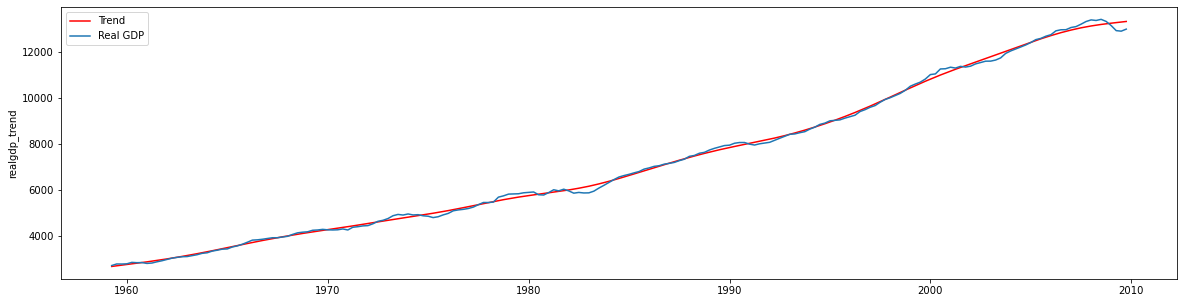

In [17]:
plt.figure(figsize=(20,5))
sns.lineplot(x=gdp_trend.index, y=gdp_trend, color='r', label='Trend')
sns.lineplot(x=gdp_trend.index, y=df['realgdp'], label='Real GDP');

In [19]:
df['trend']=gdp_trend
x=df['2000-03-31':]

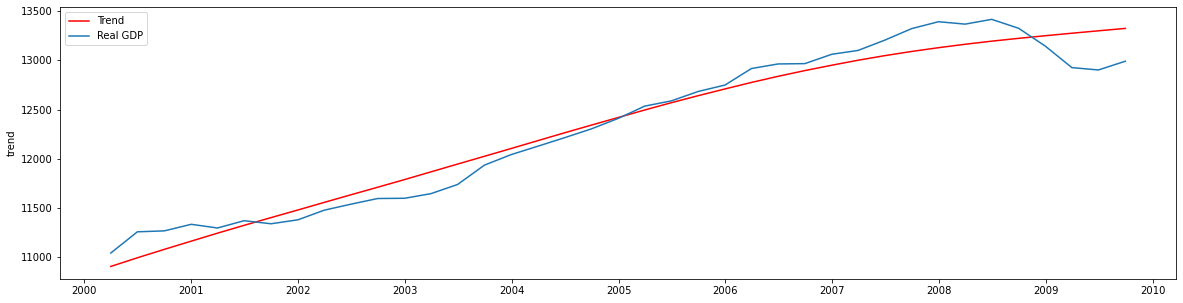

In [21]:
plt.figure(figsize=(20,5))
sns.lineplot(x=x.index, y=x['trend'], color='r', label='Trend')
sns.lineplot(x=x.index, y=x['realgdp'], label='Real GDP');

# ETS Models

In [22]:
df=pd.read_csv('UDEMY_TSA_FINAL-2/Data/airline_passengers.csv', parse_dates=True, index_col='Month')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [23]:
df.dropna(inplace=True)

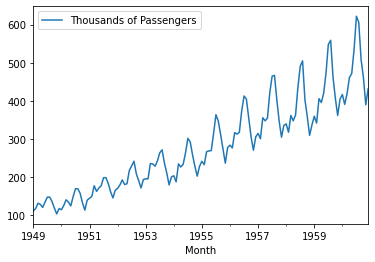

In [25]:
df.plot();

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [27]:
result=seasonal_decompose(df['Thousands of Passengers'], model='multiplicative')

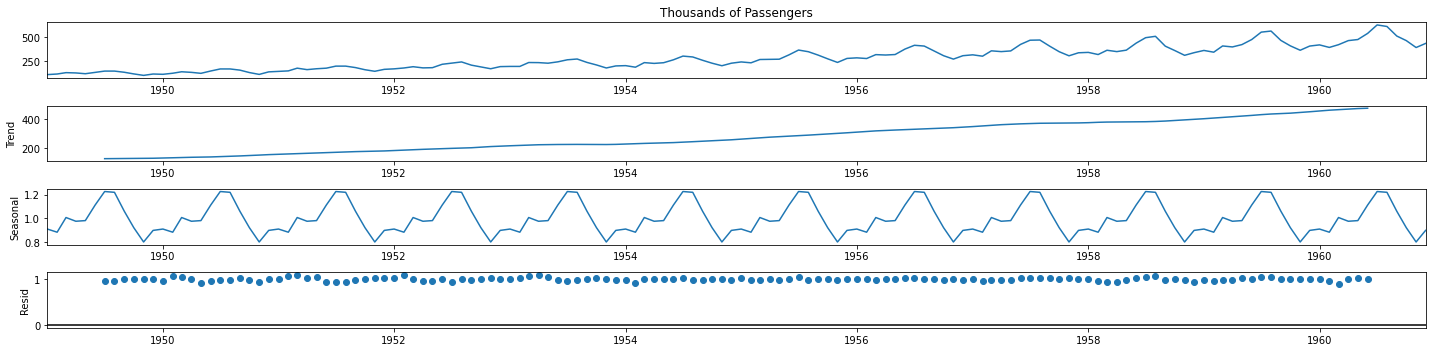

In [33]:
result.plot();

# SMA

In [35]:
df['6-month-SMA']=df['Thousands of Passengers'].rolling(window=6).mean()
df['12-month-SMA']=df['Thousands of Passengers'].rolling(window=12).mean()

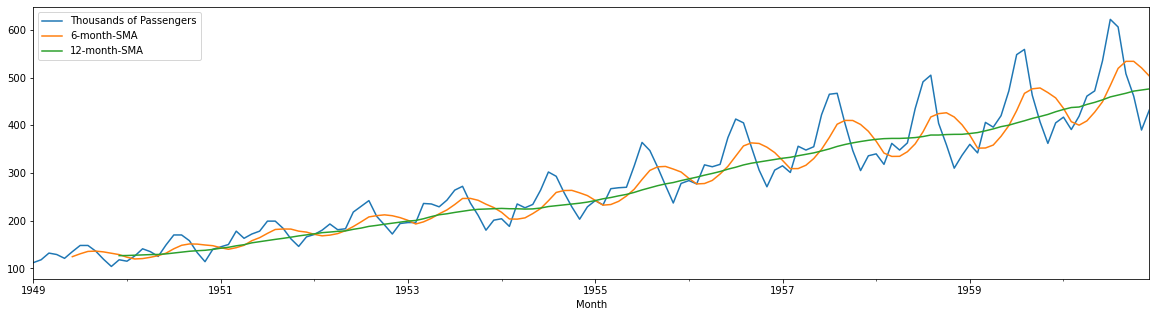

In [36]:
df.plot();

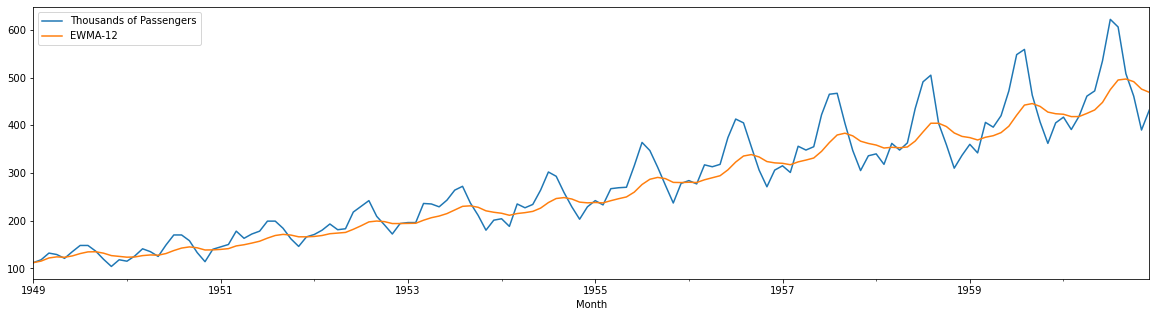

In [38]:
df['EWMA-12']=df['Thousands of Passengers'].ewm(span=12).mean()
df[['Thousands of Passengers', 'EWMA-12']].plot();

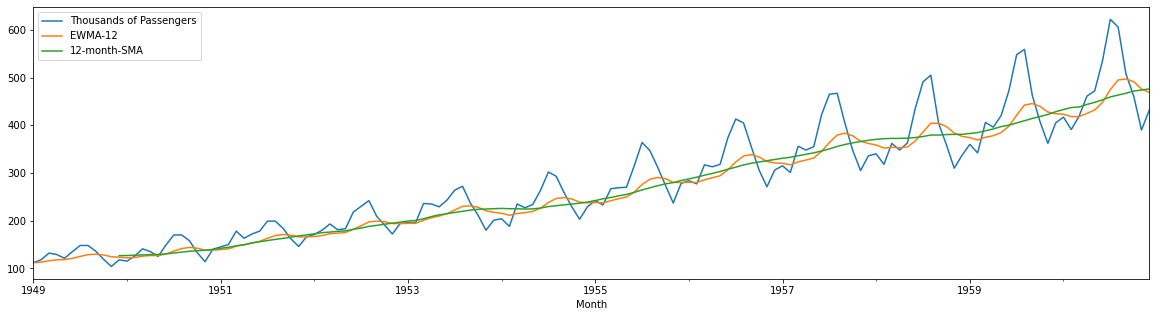

In [40]:
df[['Thousands of Passengers', 'EWMA-12', '12-month-SMA']].plot();

# Holts Winters Method

In [42]:
df=pd.read_csv('UDEMY_TSA_FINAL-2/Data/airline_passengers.csv', parse_dates=True, index_col='Month')
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [43]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [44]:
df.index.freq='MS'

In [55]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span=12
alpha=2/(span+1)

df['EWMA-12']=df['Thousands of Passengers'].ewm(alpha=alpha, adjust=False).mean()

In [56]:
model=SimpleExpSmoothing(df['Thousands of Passengers'])

/Users/harkiratchahal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [57]:
fitted_model=model.fit(smoothing_level=alpha, optimized=False)

In [58]:
fitted_model.fittedvalues

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.923077
1949-04-01    115.857988
1949-05-01    117.879836
                 ...    
1960-08-01    474.698368
1960-09-01    494.898619
1960-10-01    496.914216
1960-11-01    491.388952
1960-12-01    475.790652
Freq: MS, Length: 144, dtype: float64

In [59]:
df['SES-12']=fitted_model.fittedvalues.shift(-1)

In [60]:
df.head()

,Thousands of Passengers,EWMA-12,SES-12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


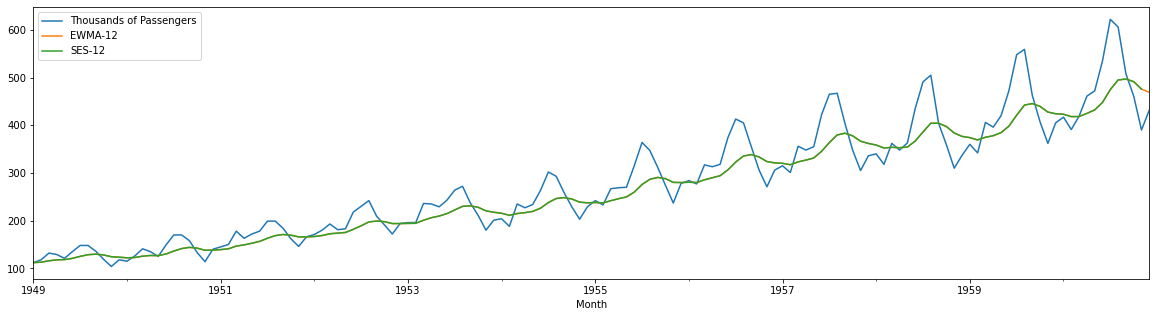

In [61]:
df.plot();

In [53]:
df.head()

,Thousands of Passengers,EWMA-12,SES-12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,117.538462,117.538462
1949-03-01,132,130.887574,130.887574
1949-04-01,129,129.145198,129.145198
1949-05-01,121,121.626554,121.626554


## Double Exponential Smoothing

In [66]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [72]:
df['DES_add_12']=ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
df['DES_mul_12']=ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)

/Users/harkiratchahal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [73]:
df.head()

,Thousands of Passengers,EWMA-12,SES-12,DES_add_12,DES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.726025,115.382342
1949-02-01,118,112.923077,112.923077,120.710594,121.618649
1949-03-01,132,115.857988,115.857988,134.718413,136.321485
1949-04-01,129,117.879836,117.879836,131.778276,133.114133
1949-05-01,121,118.359861,118.359861,123.758032,124.581833


In [74]:
df.columns

Index(['Thousands of Passengers', 'EWMA-12', 'SES-12', 'DES_add_12',
       'DES_mul_12'],
      dtype='object')

<AxesSubplot:xlabel='Month'>

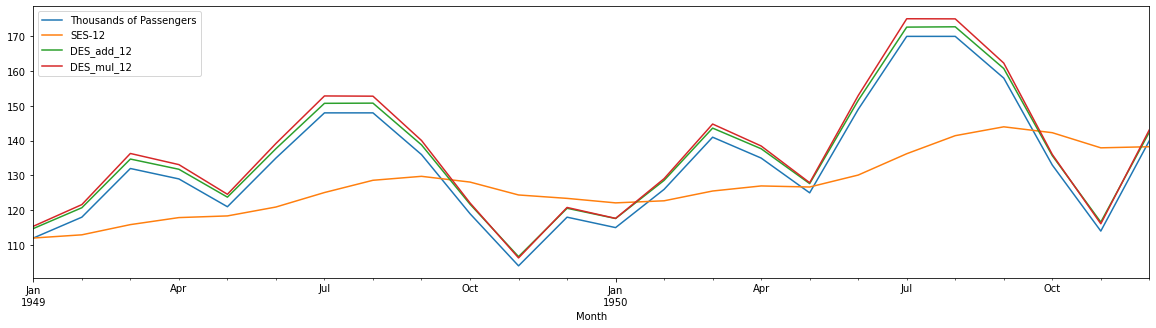

In [75]:
df[['Thousands of Passengers','SES-12','DES_add_12','DES_mul_12']].iloc[:24].plot()

## Triple Exponential Smoothing

In [77]:
df['TES_mul_12']=ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues

<AxesSubplot:xlabel='Month'>

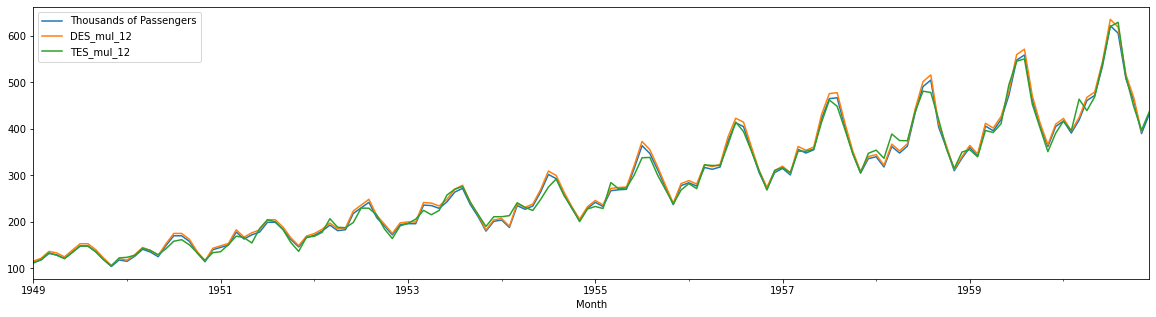

In [81]:
df[['Thousands of Passengers', 'DES_mul_12', 'TES_mul_12']].plot()

<AxesSubplot:xlabel='Month'>

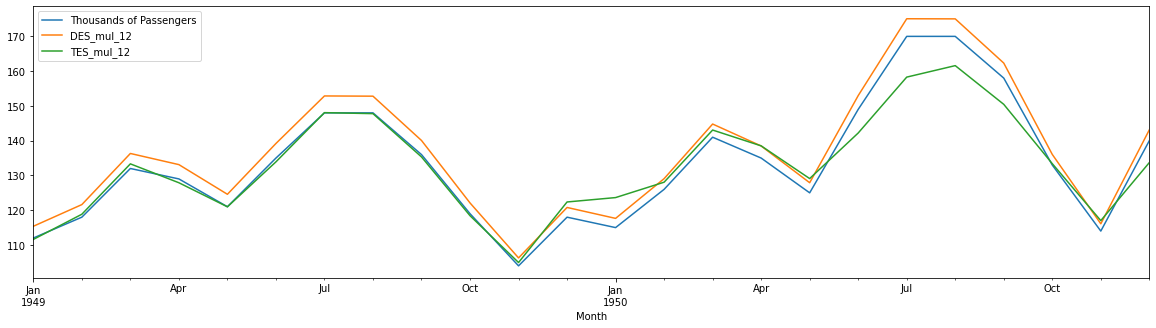

In [82]:
df[['Thousands of Passengers','DES_mul_12', 'TES_mul_12']].iloc[:24].plot()